In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import collections
from random import choices
from sklearn.metrics import accuracy_score



In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.callbacks import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# convert to one-hot-encoding
from keras.utils import to_categorical

# Transfer learning model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import *
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


Categories = list(os.listdir('/content/drive/MyDrive/dataset-processed/Train'))
Categories



['Anabaena',
 'Raphidiopsis',
 'Cylindrospermopsis',
 'Microcystis',
 'Nostoc',
 'Oscillatoria',
 'Aphanizomenon',
 'Phormidium',
 'Planktothrix',
 'Dolichospermum']

In [ ]:
import os
import cv2 # Make sure you have opencv imported as you're using cv2.imread

images = {}
images_directory = {}
base_dir = "/content/drive/MyDrive/dataset-processed/Train" # Define the base directory

for dirname in os.listdir(base_dir):
    # Construct the full path to the current subdirectory
    current_subdir_path = os.path.join(base_dir, dirname)

    if os.path.isdir(current_subdir_path): # Check if it's actually a directory
        imags = []
        imgs_directory = []
        # Iterate through files in the current subdirectory
        for i, filename in enumerate(os.listdir(current_subdir_path)):
            if 'jpg' in filename.lower() or 'png' in filename.lower(): # Use .lower() for case-insensitivity
                addr = os.path.join(current_subdir_path, filename) # Construct full path to the image
                image = cv2.cvtColor(cv2.imread(addr), cv2.COLOR_BGR2RGB) # Read as grayscale
                if image is not None: # Check if image was loaded successfully
                    image = image / 255.0
                    imags.append(image)
                    imgs_directory.append(addr)
                else:
                    print(f"Warning: Could not read image {addr}")

        images[dirname] = imags
        images_directory[dirname] = imgs_directory

# Assuming 'Categories' is already defined from your first code block
# Categories = ['Anabaena', 'Raphidiopsis', 'Cylindrospermopsis', 'Microcystis', 'Nostoc', 'Oscillatoria', 'Aphanizomenon', 'Phormidium', 'Planktothrix', 'Dolichospermum']

countofallimages = 0
for cls in Categories:
    if cls in images: # Add a check to ensure the key exists before accessing
        countofallimages += len(images[cls])
    else:
        print(f"Warning: Class '{cls}' not found in 'images' dictionary. Skipping.")


print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories)} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 2073
There are 10 classes
Average number of essential images for each class is = 207


In [ ]:
X = []
y = []
X_addr = []
for cls in Categories:
  for img in images[cls]:
    X.append(img)
    y.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_addr.append(img)
y = np.array(y)
X = np.array(X)
X_addr = np.array(X_addr)

counter = collections.Counter(y)
counter

Counter({np.str_('Anabaena'): 268,
         np.str_('Raphidiopsis'): 5,
         np.str_('Cylindrospermopsis'): 23,
         np.str_('Microcystis'): 895,
         np.str_('Nostoc'): 237,
         np.str_('Oscillatoria'): 157,
         np.str_('Aphanizomenon'): 30,
         np.str_('Phormidium'): 224,
         np.str_('Planktothrix'): 104,
         np.str_('Dolichospermum'): 130})

In [ ]:


X_train_ind, X_val_ind, y_train, y_val = train_test_split(list(range(y.shape[0])), y, test_size=0.01,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_val_addr = X_addr[X_val_ind]
X_val = X[X_val_ind]



In [ ]:


# Loading Test DataSet:

images = {}
images_directory = {}
for dirname in os.listdir("/content/drive/MyDrive/dataset-processed/Test"):
    dir = "/content/drive/MyDrive/dataset-processed/Test/"+dirname
    if os.path.isdir(dir):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(dir)):
          if 'jpg' in filename or 'png' in filename:
              addr = dir+"/"+filename
              image = cv2.cvtColor(cv2.imread(addr), cv2.COLOR_BGR2RGB)
              image = image/255.0
              imags.append(image)
              imgs_directory.append(addr)
        images[dirname] = imags
        images_directory[dirname] = imgs_directory



In [ ]:


X_test = []
y_test = []
X_test_addr = []
for cls in Categories:
  for img in images[cls]:
    X_test.append(img)
    y_test.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_test_addr.append(img)
y_test = np.array(y_test)
X_test = np.array(X_test)
X_test_addr = np.array(X_test_addr)



In [ ]:
counter = collections.Counter(y_test)
counter

Counter({np.str_('Anabaena'): 56,
         np.str_('Raphidiopsis'): 2,
         np.str_('Cylindrospermopsis'): 3,
         np.str_('Microcystis'): 235,
         np.str_('Nostoc'): 73,
         np.str_('Oscillatoria'): 32,
         np.str_('Aphanizomenon'): 4,
         np.str_('Phormidium'): 61,
         np.str_('Planktothrix'): 19,
         np.str_('Dolichospermum'): 33})

In [ ]:


del images
del images_directory
del X
del X_val_addr
del y



In [ ]:
def generateimage(img, y, count):
    new_X_train = []
    new_y_train = []
    i = 0
    y = np.array(y).reshape((1,))

    flow = demo_datagen.flow(img.reshape((1, img.shape[0], img.shape[1], 3)), y, batch_size=12)
    for batch, ind in flow:
        if i >= count:
            break
        new_X_train.append(batch[0])  # keep full RGB image
        new_y_train.append(ind[0])
        i += 1

    new_X_train = np.array(new_X_train)
    new_y_train = np.array(new_y_train)
    return new_X_train, new_y_train

In [ ]:
def preprocessing(X_train,y_train,downsampling=True,upsampling=True):
  new_X = []
  new_y = []
  new_X_addr = []
  counter = collections.Counter(y_train)
  for cls in Categories:
    print(cls)
    if counter[cls] > np.round(np.mean(list(counter.values()))) :
      select_prob = (np.round(np.mean(list(counter.values()))) /counter[cls]) +0.3
      for ind , x in enumerate(X_train):
        if y_train[ind] == cls:
            if downsampling:
                choise = choices([1,0], [select_prob,1-select_prob])
                if choise==[1]:
                    new_X.append(x)
                    new_y.append(cls)
                    new_X_addr.append(X_train_addr[ind])
            else:
                new_X.append(x)
                new_y.append(cls)
                new_X_addr.append(X_addr[ind])



    if counter[cls] < np.round(np.mean(list(counter.values()))):
      if upsampling:
        generate_number = int(np.round(np.round(np.mean(list(counter.values()))) /counter[cls]))
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            n_x,n_y = generateimage(x ,y_train[ind],generate_number)
            for xx in n_x:
                new_X.append(xx)
                new_y.append(cls)
                new_X_addr.append(X_train_addr[ind])
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])
      else:
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])


  new_X = np.array(new_X)
  new_y = np.array(new_y)
  new_X_addr = np.array(new_X_addr)
  return new_X,new_y,new_X_addr

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    #rescale=1./255,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
new_X_train, new_y_train, new_X_addr = preprocessing(X_train,y_train,downsampling=True,upsampling=True)

Anabaena
Raphidiopsis
Cylindrospermopsis
Microcystis
Nostoc
Oscillatoria
Aphanizomenon
Phormidium
Planktothrix
Dolichospermum


In [ ]:
counter = collections.Counter(new_y_train)
counter

Counter({np.str_('Anabaena'): 267,
         np.str_('Raphidiopsis'): 210,
         np.str_('Cylindrospermopsis'): 220,
         np.str_('Microcystis'): 469,
         np.str_('Nostoc'): 233,
         np.str_('Oscillatoria'): 312,
         np.str_('Aphanizomenon'): 240,
         np.str_('Phormidium'): 221,
         np.str_('Planktothrix'): 312,
         np.str_('Dolichospermum'): 390})

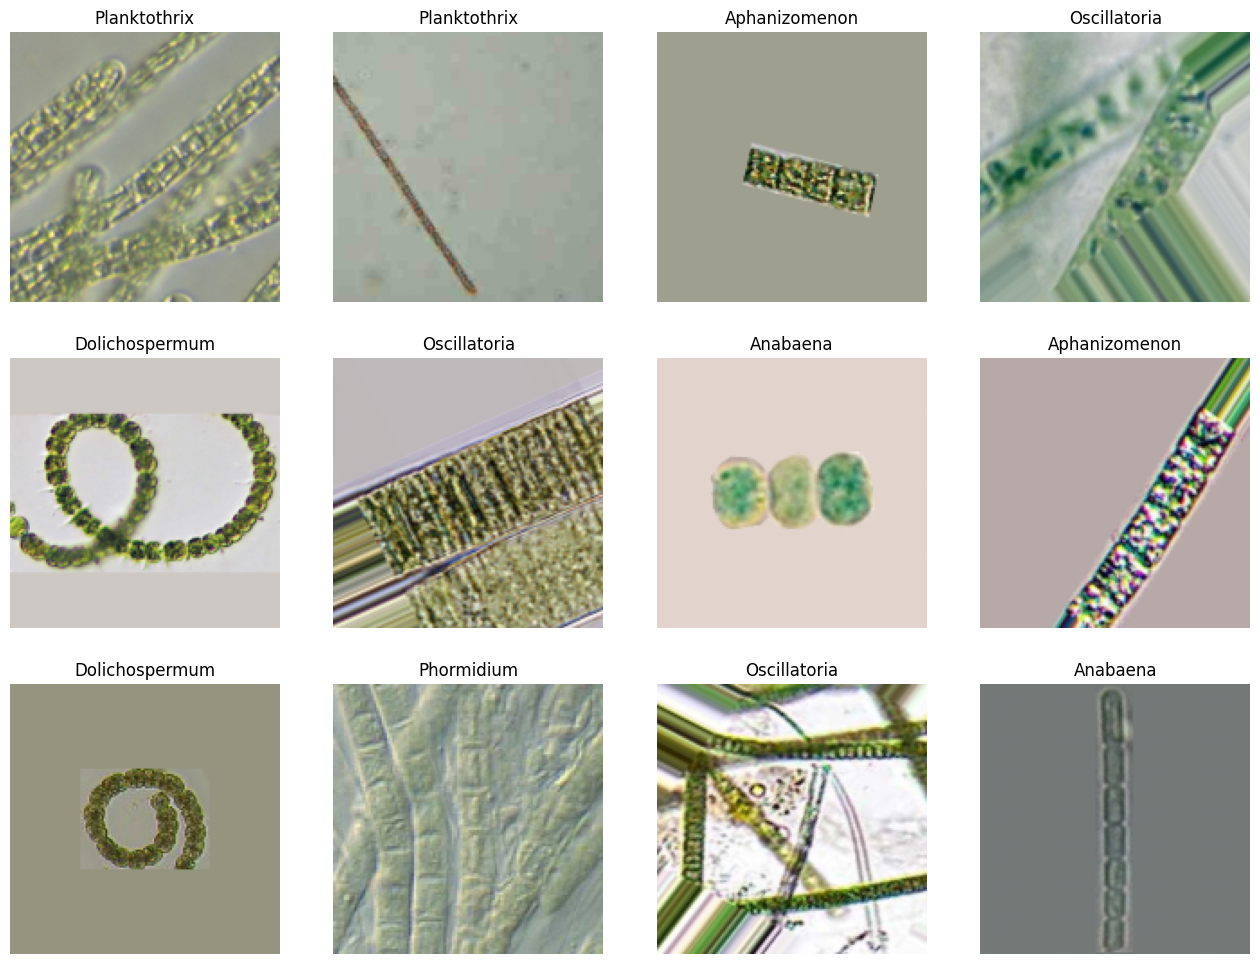

In [ ]:
plt.figure(figsize=(16,12))
for n , i in enumerate(list(np.random.randint(0,len(new_X_train),12))) :
  plt.subplot(3,4,n+1)
  plt.imshow(new_X_train[i])
  plt.axis('off')
  plt.title(new_y_train[i])

In [ ]:


new_X_train.shape  # ✅ Already RGB



(2874, 150, 150, 3)

In [ ]:
encoder = LabelEncoder()
encoder.fit(new_y_train)
encoded_labels_train = encoder.transform(new_y_train)
encoded_labels_test = encoder.transform(y_test)
encoded_labels_val = encoder.transform(y_val)

OneHot_labels_train = to_categorical(encoded_labels_train,num_classes=len(Categories))
OneHot_labels_test = to_categorical(encoded_labels_test,num_classes=len(Categories))
OneHot_labels_val = to_categorical(encoded_labels_val,num_classes=len(Categories))

new_y_train



array(['Anabaena', 'Anabaena', 'Anabaena', ..., 'Dolichospermum',
       'Dolichospermum', 'Dolichospermum'], dtype='<U18')

In [ ]:
OneHot_labels_train.shape

(2874, 10)

In [ ]:
def labelwithoutput(output):
  listt = []
  for o in output:
    listt.append(np.argmax(o))
  return np.array(listt)

In [ ]:
# MobileNetV2 Model


model =MobileNetV2(input_shape = (150, 150, 3),include_top = False, weights = 'imagenet')
for layer in model.layers[0:len(model.layers)-60]:
     layer.trainable = False
model_output = GlobalAveragePooling2D()(model.output)
model_output = Dense(32, activation='relu')(model_output)
model_output = Dense(16, activation='relu')(model_output)
model_output = Dense(10, activation='softmax')(model_output)
model=Model(inputs=[model.input],outputs=model_output)
model.summary()

/tmp/ipython-input-43-3591568409.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model =MobileNetV2(input_shape = (150, 150, 3),include_top = False, weights = 'imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,299,674 (8.77 MB)

 Trainable params: 1,997,402 (7.62 MB)

 Non-trainable params: 302,272 (1.15 MB)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    # Convert the TensorFlow tensor to a float
    return (lr * tf.math.exp(-0.1)).numpy()
    # Alternatively, for broader compatibility:
    # return tf.keras.backend.get_value(lr * tf.math.exp(-0.1))

callback = LearningRateScheduler(scheduler)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
filepath = '/content/drive/MyDrive/dataset-processed/callback.h5'
checkpoint = ModelCheckpoint(filepath,
                             monitor = 'val_loss',
                             save_best_only=True,
                             verbose = 1)

model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(new_X_train,
                    OneHot_labels_train,
                    validation_data = (X_val, OneHot_labels_val),
                    epochs = 40,
                    callbacks=[callback, checkpoint],
                    verbose = 1)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1777 - loss: 0.4406

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)



Epoch 1: val_loss improved from inf to 0.37533, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.1792 - loss: 0.4393 - val_accuracy: 0.5238 - val_loss: 0.3753 - learning_rate: 0.0010
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7227 - loss: 0.1438
Epoch 2: val_loss did not improve from 0.37533
90/90 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7232 - loss: 0.1436 - val_accuracy: 0.2857 - val_loss: 1.2650 - learning_rate: 0.0010
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8747 - loss: 0.0840
Epoch 3: val_loss did not improve from 0.37533
90/90 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8746 - loss: 0.0840 - val_accuracy: 0.5238 - val_loss: 1.2732 - learning_rate: 0.0010
Epoch 4/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9037 - loss: 0.0589
Epoch 4: val_loss did not improve from 0.37533
90/90 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9038 - loss: 0.0589 - val_accuracy: 0.5714 - val_loss: 1.0187 - learning_rate: 0.0010
Epoch 5/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step

90/90 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9898 - loss: 0.0058 - val_accuracy: 0.8095 - val_loss: 0.3185 - learning_rate: 4.9659e-04
Epoch 13/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9966 - loss: 0.0027
Epoch 13: val_loss improved from 0.31850 to 0.11372, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9966 - loss: 0.0027 - val_accuracy: 0.9048 - val_loss: 0.1137 - learning_rate: 4.4933e-04
Epoch 14/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.9981 - loss: 0.0017
Epoch 14: val_loss did not improve from 0.11372
90/90 ━━━━━━━━━━━━━━━━━━━━ 139s 1000ms/step - accuracy: 0.9980 - loss: 0.0017 - val_accuracy: 0.8571 - val_loss: 0.1965 - learning_rate: 4.0657e-04
Epoch 15/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9942 - loss: 0.0042
Epoch 15: val_loss improved from 0.11372 to 0.06874, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9942 - loss: 0.0042 - val_accuracy: 0.9524 - val_loss: 0.0687 - learning_rate: 3.6788e-04
Epoch 16/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9947 - loss: 0.0042
Epoch 16: val_loss did not improve from 0.06874
90/90 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9948 - loss: 0.0042 - val_accuracy: 0.9048 - val_loss: 0.1159 - learning_rate: 3.3287e-04
Epoch 17/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.9963 - loss: 0.0022
Epoch 17: val_loss did not improve from 0.06874
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9963 - loss: 0.0022 - val_accuracy: 0.9048 - val_loss: 0.0873 - learning_rate: 3.0119e-04
Epoch 18/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.9970 - loss: 0.0019
Epoch 18: val_loss did not improve from 0.06874
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9971 - loss: 0.0019 - val_accuracy: 0.9048 - val_loss: 0.1348 - learning_rate: 2.7253e-04
Epoch 19/40
90/90 ━━━━

90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9948 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0128 - learning_rate: 2.4660e-04
Epoch 20/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9970 - loss: 0.0020
Epoch 20: val_loss improved from 0.01284 to 0.00174, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9970 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017 - learning_rate: 2.2313e-04
Epoch 21/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.9980 - loss: 0.0015
Epoch 21: val_loss improved from 0.00174 to 0.00019, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9980 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.8796e-04 - learning_rate: 2.0190e-04
Epoch 22/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9994 - loss: 6.4461e-04
Epoch 22: val_loss improved from 0.00019 to 0.00007, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9994 - loss: 6.4737e-04 - val_accuracy: 1.0000 - val_loss: 6.6178e-05 - learning_rate: 1.8268e-04
Epoch 23/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 990ms/step - accuracy: 0.9999 - loss: 5.6289e-04
Epoch 23: val_loss did not improve from 0.00007
90/90 ━━━━━━━━━━━━━━━━━━━━ 139s 995ms/step - accuracy: 0.9999 - loss: 5.6416e-04 - val_accuracy: 1.0000 - val_loss: 2.7573e-04 - learning_rate: 1.6530e-04
Epoch 24/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.9995 - loss: 4.5728e-04
Epoch 24: val_loss did not improve from 0.00007
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9995 - loss: 4.5924e-04 - val_accuracy: 1.0000 - val_loss: 6.6503e-05 - learning_rate: 1.4957e-04
Epoch 25/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.9979 - loss: 0.0013
Epoch 25: val_loss did not improve from 0.00007
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9979 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.5217e-04 - learnin

90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 1.0000 - loss: 3.1789e-04 - val_accuracy: 1.0000 - val_loss: 3.8100e-05 - learning_rate: 6.0810e-05
Epoch 34/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 2.0683e-04
Epoch 34: val_loss improved from 0.00004 to 0.00003, saving model to /content/drive/MyDrive/dataset-processed/callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 1.0000 - loss: 2.0759e-04 - val_accuracy: 1.0000 - val_loss: 3.0876e-05 - learning_rate: 5.5023e-05
Epoch 35/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 1.0000 - loss: 2.8140e-04
Epoch 35: val_loss did not improve from 0.00003
90/90 ━━━━━━━━━━━━━━━━━━━━ 139s 998ms/step - accuracy: 1.0000 - loss: 2.8430e-04 - val_accuracy: 1.0000 - val_loss: 3.7500e-05 - learning_rate: 4.9787e-05
Epoch 36/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 1.3516e-04
Epoch 36: val_loss did not improve from 0.00003
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 1.0000 - loss: 1.3514e-04 - val_accuracy: 1.0000 - val_loss: 6.4055e-05 - learning_rate: 4.5049e-05
Epoch 37/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9998 - loss: 1.7508e-04
Epoch 37: val_loss did not improve from 0.00003
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9998 - loss: 1.7572e-04 - val_accuracy: 1.0000 - val_loss: 6.9881e-05 - lear

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16





#vggmodel.load_weights('/content/drive/MyDrive/dataset-processed/callback.h5')
model.load_weights('/content/drive/MyDrive/dataset-processed/mobilev2-92perfect.h5')

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 524ms/step - accuracy: 0.9009 - loss: 0.0773
Test Loss: 0.06985746324062347
Test Accuracy : 0.9131274223327637


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 150, 150, 3))
  warnings.warn(msg)


16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 563ms/step
                    precision    recall  f1-score   support

          Anabaena     0.8980    0.7857    0.8381        56
     Aphanizomenon     0.5000    1.0000    0.6667         4
Cylindrospermopsis     1.0000    0.6667    0.8000         3
    Dolichospermum     0.8056    0.8788    0.8406        33
       Microcystis     0.9582    0.9745    0.9662       235
            Nostoc     0.9595    0.9726    0.9660        73
      Oscillatoria     0.9286    0.8125    0.8667        32
        Phormidium     0.8889    0.7869    0.8348        61
      Planktothrix     0.7037    1.0000    0.8261        19
      Raphidiopsis     1.0000    0.5000    0.6667         2

          accuracy                         0.9131       518
         macro avg     0.8642    0.8378    0.8272       518
      weighted avg     0.9197    0.9131    0.9131       518



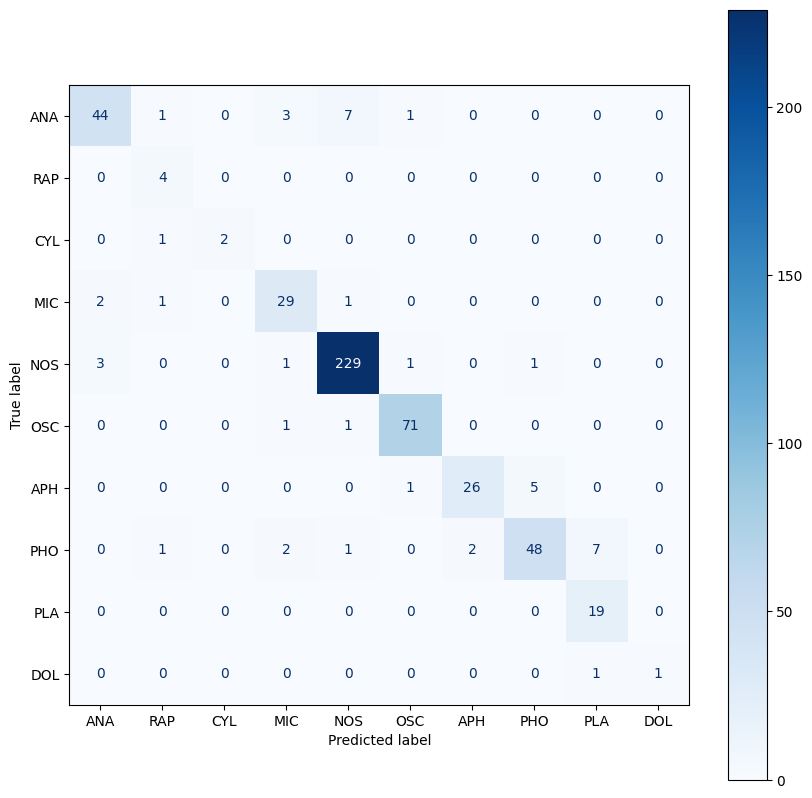

In [ ]:
# Evaluate
test_Loss, test_Acc = model.evaluate(X_test, OneHot_labels_test)
print('Test Loss:', test_Loss)
print('Test Accuracy :', test_Acc)

# Predict
Y_pred = model.predict(X_test)
Y_pred = encoder.inverse_transform(labelwithoutput(Y_pred))

# Classification Report
print(classification_report(y_test, Y_pred, digits=4))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred), display_labels=[cl[:3].upper() for cl in Categories])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues')
plt.show()


In [ ]:


new_layer = Flatten()(model.layers[-5].output)
intermediate_layer_model = Model(inputs=model.input,
                                       outputs=new_layer)
intermediate_output_train = intermediate_layer_model.predict(new_X_train)
intermediate_output_test = intermediate_layer_model.predict(X_test)



/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 150, 150, 3))
  warnings.warn(msg)


89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 535ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 541ms/step


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(intermediate_output_train)
X_new = pca.transform(intermediate_output_train)
X_test_new = pca.transform(intermediate_output_test)

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to integers
encoder = LabelEncoder()
new_y_train_encoded = encoder.fit_transform(new_y_train)
y_test_encoded = encoder.transform(y_test)


xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
xgb_cl.fit(X_new, new_y_train_encoded)
Y_pred_encoded = xgb_cl.predict(X_test_new)
Y_pred = encoder.inverse_transform(Y_pred_encoded) # Inverse transform to get original labels for classification report
accuracy_score(y_test_encoded, Y_pred_encoded)
print(classification_report(y_test, Y_pred))

                    precision    recall  f1-score   support

          Anabaena       0.82      0.89      0.85        56
     Aphanizomenon       0.57      1.00      0.73         4
Cylindrospermopsis       0.67      0.67      0.67         3
    Dolichospermum       0.81      0.88      0.84        33
       Microcystis       0.98      0.97      0.98       235
            Nostoc       0.96      0.89      0.92        73
      Oscillatoria       0.85      0.88      0.86        32
        Phormidium       0.96      0.75      0.84        61
      Planktothrix       0.66      1.00      0.79        19
      Raphidiopsis       1.00      0.50      0.67         2

          accuracy                           0.91       518
         macro avg       0.83      0.84      0.82       518
      weighted avg       0.92      0.91      0.91       518



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
accuracy_score(y_test, Y_pred)
print(classification_report(y_test, Y_pred))

                    precision    recall  f1-score   support

          Anabaena       0.88      0.88      0.88        56
     Aphanizomenon       0.57      1.00      0.73         4
Cylindrospermopsis       1.00      0.67      0.80         3
    Dolichospermum       0.78      0.88      0.83        33
       Microcystis       0.98      0.96      0.97       235
            Nostoc       0.97      0.95      0.96        73
      Oscillatoria       0.79      0.84      0.82        32
        Phormidium       0.92      0.75      0.83        61
      Planktothrix       0.63      1.00      0.78        19
      Raphidiopsis       1.00      0.50      0.67         2

          accuracy                           0.91       518
         macro avg       0.85      0.84      0.83       518
      weighted avg       0.92      0.91      0.91       518



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, new_y_train)
Y_pred = neigh.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9227799227799228
                    precision    recall  f1-score   support

          Anabaena     0.8500    0.9107    0.8793        56
     Aphanizomenon     0.5714    1.0000    0.7273         4
Cylindrospermopsis     1.0000    0.6667    0.8000         3
    Dolichospermum     0.9667    0.8788    0.9206        33
       Microcystis     0.9785    0.9702    0.9744       235
            Nostoc     0.9583    0.9452    0.9517        73
      Oscillatoria     0.7879    0.8125    0.8000        32
        Phormidium     0.9057    0.7869    0.8421        61
      Planktothrix     0.7308    1.0000    0.8444        19
      Raphidiopsis     1.0000    1.0000    1.0000         2

          accuracy                         0.9228       518
         macro avg     0.8749    0.8971    0.8740       518
      weighted avg     0.9287    0.9228    0.9235       518



In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred,digits=4))

0.9015444015444015
                    precision    recall  f1-score   support

          Anabaena     0.9020    0.8214    0.8598        56
     Aphanizomenon     0.5000    1.0000    0.6667         4
Cylindrospermopsis     1.0000    0.6667    0.8000         3
    Dolichospermum     0.6905    0.8788    0.7733        33
       Microcystis     0.9826    0.9617    0.9720       235
            Nostoc     0.9571    0.9178    0.9371        73
      Oscillatoria     0.7941    0.8438    0.8182        32
        Phormidium     0.9200    0.7541    0.8288        61
      Planktothrix     0.6333    1.0000    0.7755        19
      Raphidiopsis     1.0000    0.5000    0.6667         2

          accuracy                         0.9015       518
         macro avg     0.8380    0.8344    0.8098       518
      weighted avg     0.9163    0.9015    0.9042       518



In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

0.918918918918919
                    precision    recall  f1-score   support

          Anabaena       0.88      0.89      0.88        56
     Aphanizomenon       0.57      1.00      0.73         4
Cylindrospermopsis       1.00      0.67      0.80         3
    Dolichospermum       0.85      0.88      0.87        33
       Microcystis       0.98      0.97      0.98       235
            Nostoc       0.96      0.95      0.95        73
      Oscillatoria       0.77      0.84      0.81        32
        Phormidium       0.92      0.75      0.83        61
      Planktothrix       0.70      1.00      0.83        19
      Raphidiopsis       1.00      1.00      1.00         2

          accuracy                           0.92       518
         macro avg       0.86      0.90      0.87       518
      weighted avg       0.93      0.92      0.92       518



In [ ]:
# Add data
epochs = [f'{str(i)}' for i in range(1,41)]
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']


import plotly.graph_objects as go

fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=epochs, y=train_accuracy, name='Train Accuracy',
                         line=dict(color='firebrick', width=4)))

fig.add_trace(go.Scatter(x=epochs, y=val_loss, name='Val Loss',
                         line=dict(color='royalblue', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=epochs, y=train_loss, name='Train Loss',
                         line=dict(color='firebrick', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, name='Val Accuracy',
                         line=dict(color='royalblue', width=4)))

# Edit the layout
fig.update_layout(title='Epoch/Loss Plot',
                  xaxis_title='Epochs',
                  yaxis_title='Loss / Accuracy (%)',
                  legend_title='Legend',
                  template='plotly_white')

fig.show()
